In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
warnings.filterwarnings("ignore")

In [77]:
datadir = ''
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('../data/driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', None)
print("data.shape: ", data.shape)
data.head()

data.shape:  (4057, 7)


center  \
0  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\center_2023_12_23_00_12_37_973.jpg   
1  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\center_2023_12_23_00_12_38_039.jpg   
2  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\center_2023_12_23_00_12_38_110.jpg   
3  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\center_2023_12_23_00_12_38_177.jpg   
4  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\center_2023_12_23_00_12_38_247.jpg   

                                                                                                          left  \
0  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\left_2023_12_23_00_12_37_973.jpg   
1  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\left_2023_12_23_00_12_38_039.jpg   
2  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\left_2023_12_23_00_12_38_110.jpg   
3  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\left_2023_12_23_00_12_38_177.jpg   
4  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\left_2023_12_23_00_12_38_247.jpg   

                                                                                                          right  \
0  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\right_2023_12_23_00_12_37_973.jpg   
1  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\right_2023_12_23_00_12_38_039.jpg   
2  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\right_2023_12_23_00_12_38_110.jpg   
3  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\right_2023_12_23_00_12_38_177.jpg   
4  C:\AI\TrainingBasic\与Unity结合的自动驾驶的神经网络训练TensorFlow\SelfdrivingCar\data\IMG\right_2023_12_23_00_12_38_247.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0        0  0.000019  
1       0.0       0.0        0  0.000010  
2       0.0       0.0        0  0.000012  
3       0.0       0.0        0  0.000010  
4       0.0       0.0        0  0.000021

In [78]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2023_12_23_00_12_37_973.jpg  left_2023_12_23_00_12_37_973.jpg   
1  center_2023_12_23_00_12_38_039.jpg  left_2023_12_23_00_12_38_039.jpg   
2  center_2023_12_23_00_12_38_110.jpg  left_2023_12_23_00_12_38_110.jpg   
3  center_2023_12_23_00_12_38_177.jpg  left_2023_12_23_00_12_38_177.jpg   
4  center_2023_12_23_00_12_38_247.jpg  left_2023_12_23_00_12_38_247.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2023_12_23_00_12_37_973.jpg       0.0       0.0        0  0.000019  
1  right_2023_12_23_00_12_38_039.jpg       0.0       0.0        0  0.000010  
2  right_2023_12_23_00_12_38_110.jpg       0.0       0.0        0  0.000012  
3  right_2023_12_23_00_12_38_177.jpg       0.0       0.0        0  0.000010  
4  right_2023_12_23_00_12_38_247.jpg       0.0       0.0        0  0.000021

In [79]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


total data: 4057


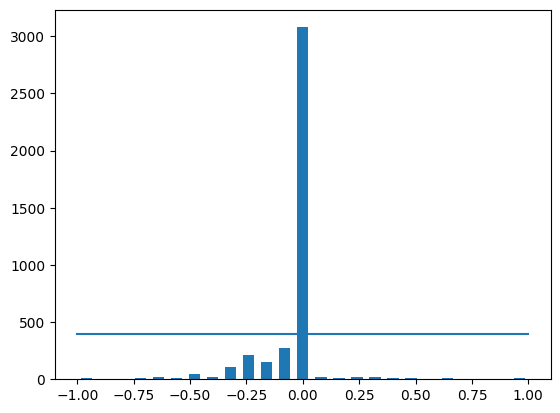

In [80]:
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))
print('total data:', len(data))

In [81]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2679
remaining: 1378


total data: 1378


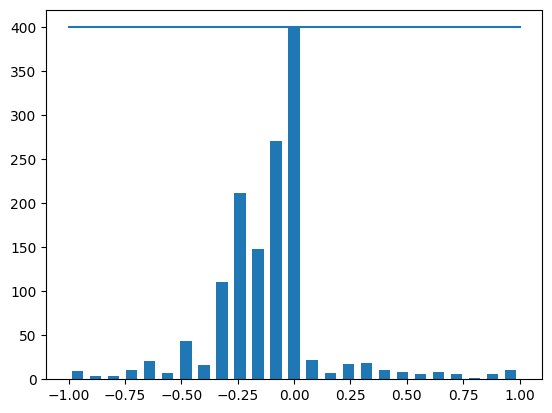

In [82]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))
print('total data:', len(data))

In [83]:
print(data.iloc[1])

center      center_2023_12_23_00_12_38_723.jpg
left          left_2023_12_23_00_12_38_723.jpg
right        right_2023_12_23_00_12_38_723.jpg
steering                                   0.0
throttle                                   0.0
reverse                                      0
speed                                 0.000014
Name: 11, dtype: object


In [84]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering("../data/img", data)

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3307
Valid Samples: 827


Text(0.5, 1.0, 'Validation set')

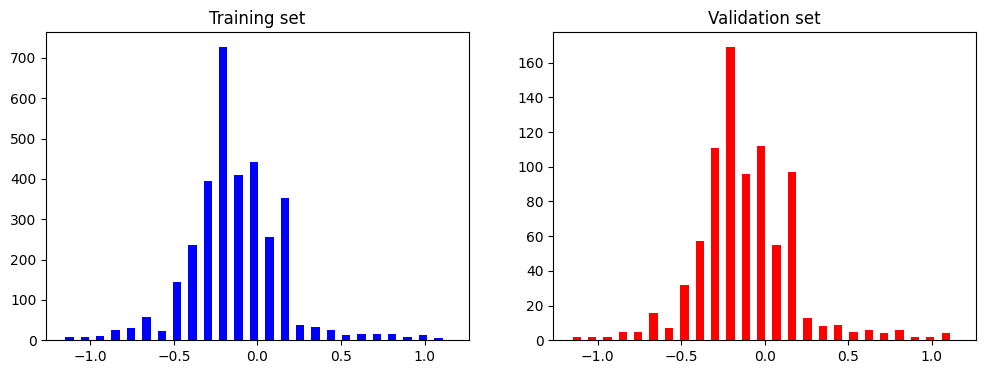

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Zoomed Image')

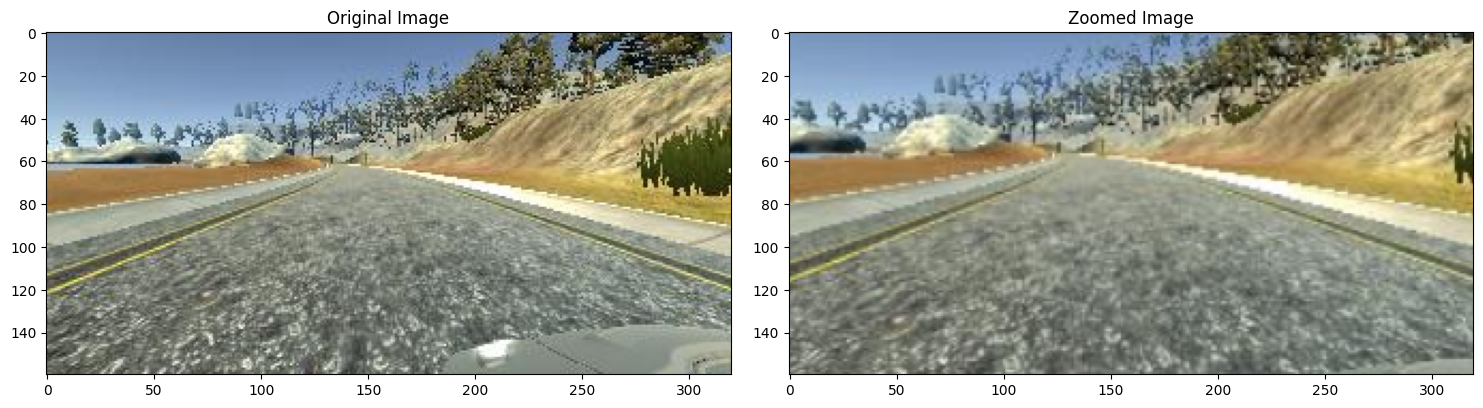

In [87]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

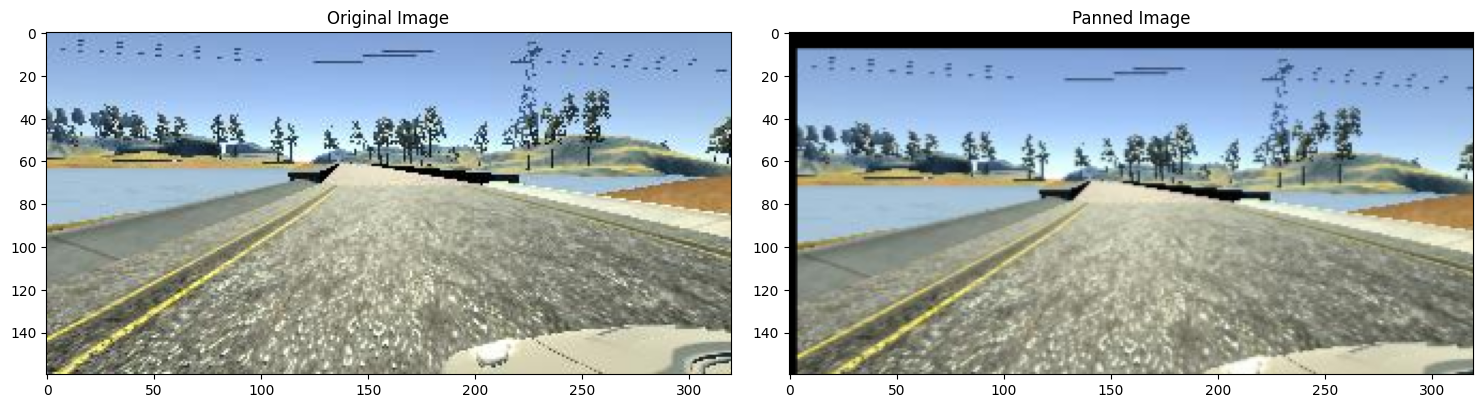

In [88]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

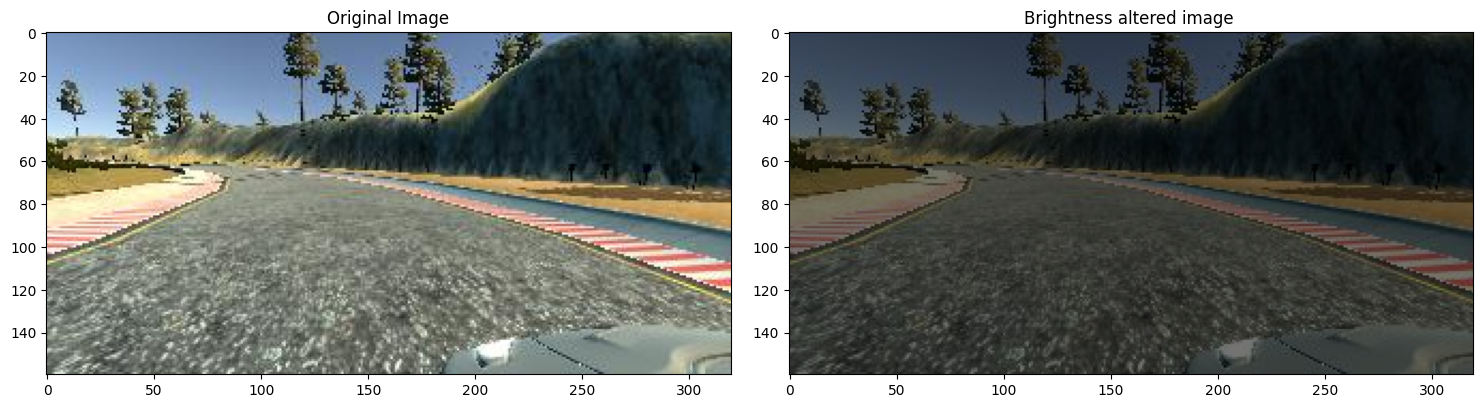

In [89]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.0')

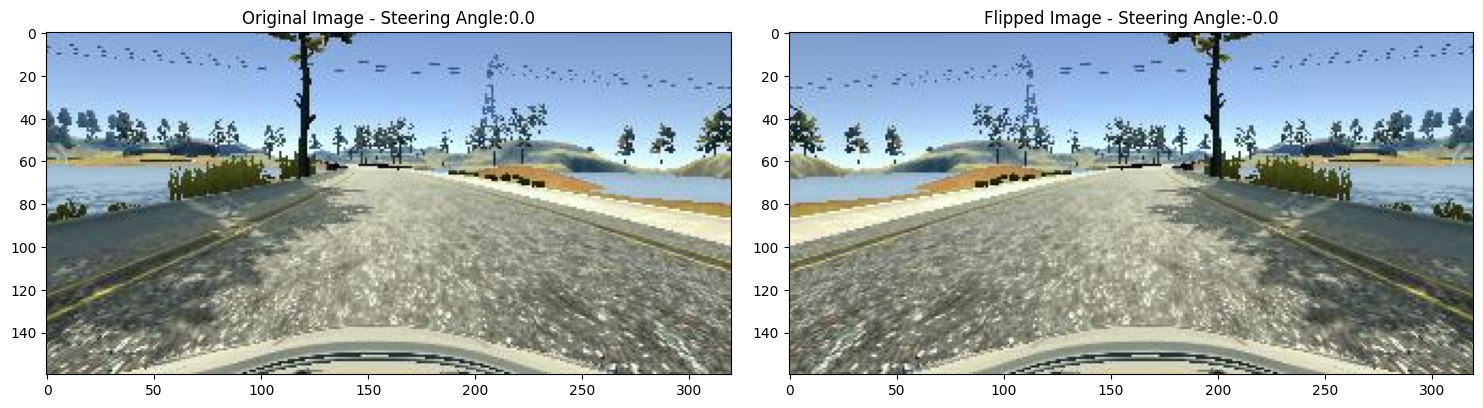

In [90]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

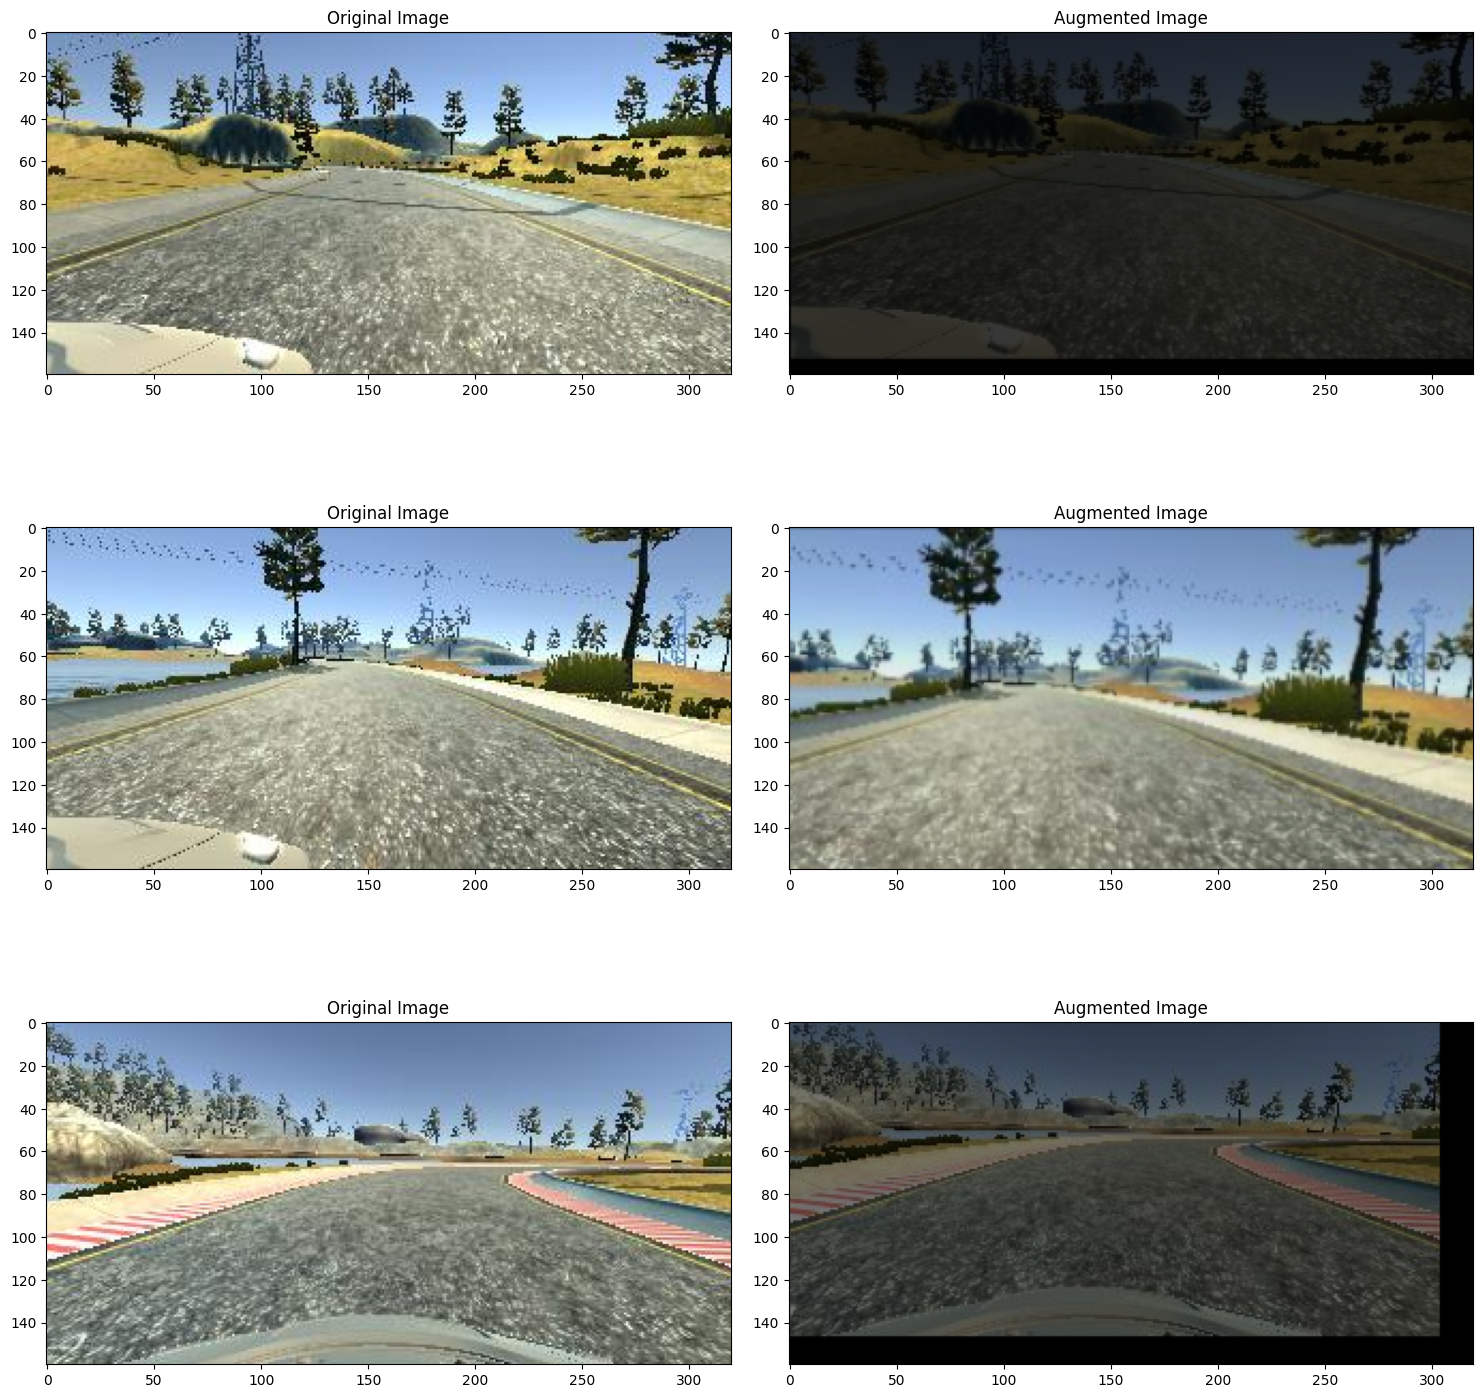

In [91]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle
ncol = 2
nrow = 3
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5*nrow))
fig.tight_layout()
 
for i in range(nrow):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

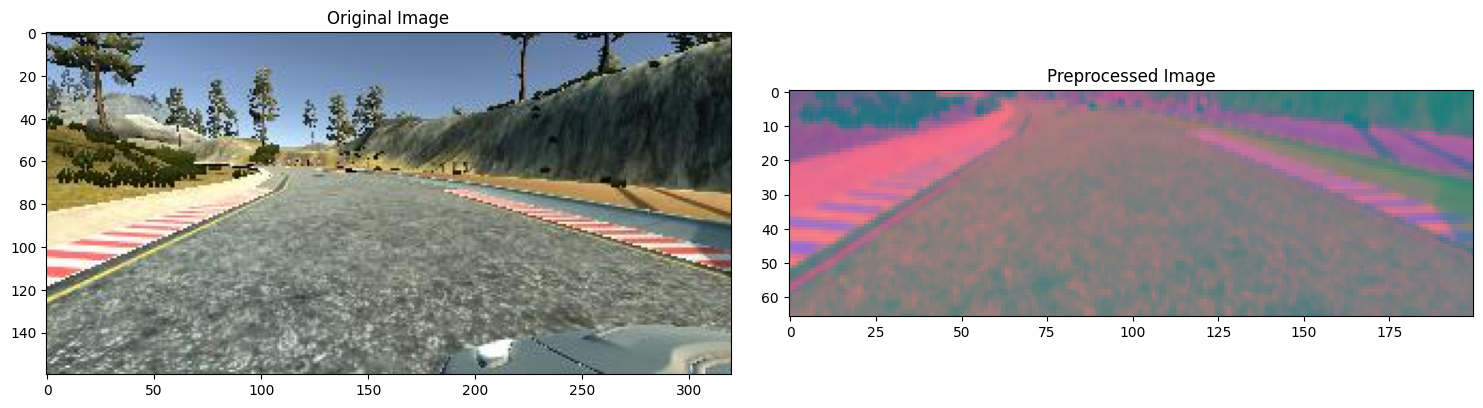

In [92]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

Text(0.5, 1.0, 'Preprocessed Image')

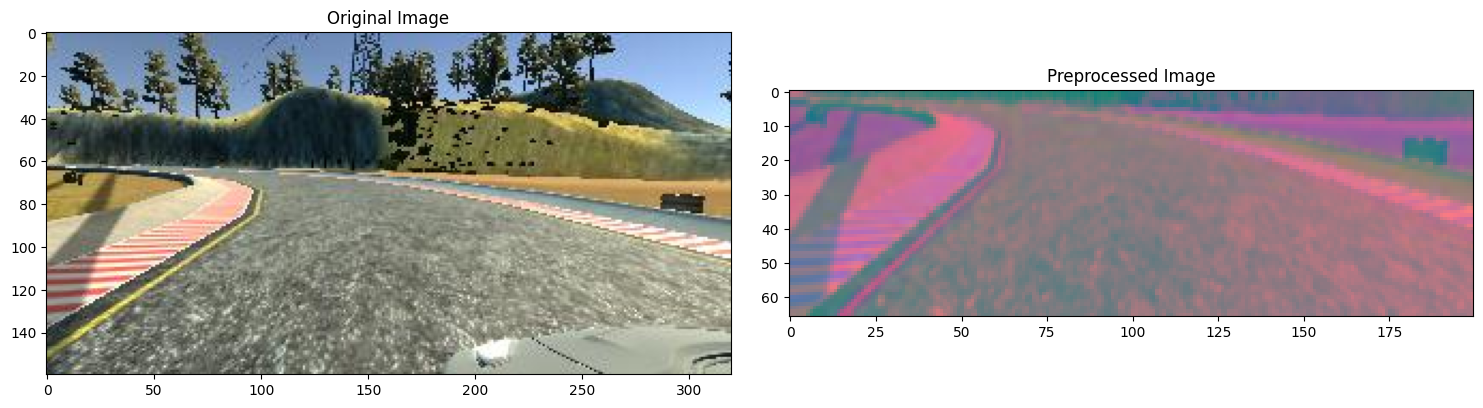

In [93]:
image = image_paths[2500]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [94]:
def batch_generator(image_paths, steering_ang, batch_size, istraining, show_image = False):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      processed_im = img_preprocess(im)
      batch_img.append(processed_im)
      batch_steering.append(steering)
    
    if show_image:
      fig, axs = plt.subplots(1, 2, figsize=(10, 3))
      fig.tight_layout()
      axs[0].imshow(im)
      if istraining:
        axs[0].set_title('Original Image')
      else:
        axs[0].set_title('Validation Image')
      axs[1].imshow(processed_im)
      axs[1].set_title('Preprocessed Image\nSteering Angle:' + str(steering))

    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

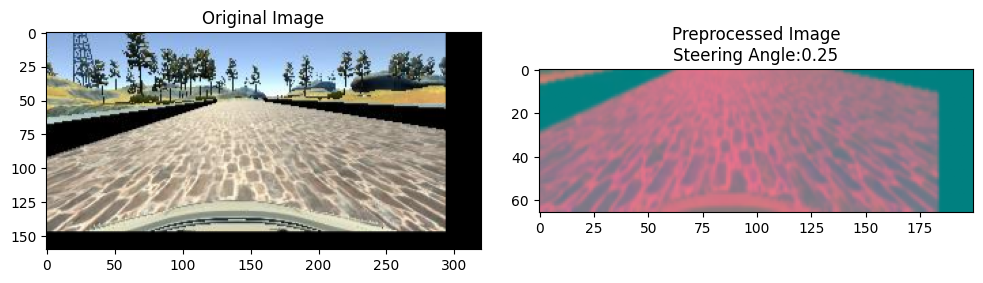

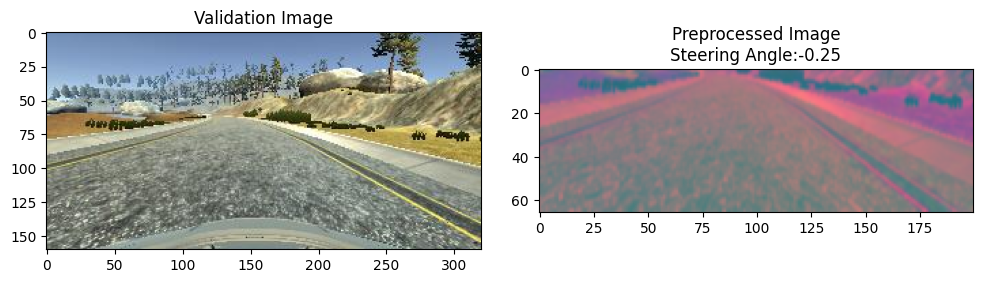

In [95]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1, True))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0, True))
 
# # show one training image and one validation image as an example
# fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
#  
# axs[0].imshow(x_train_gen[0])
# axs[0].set_title('Training Image')
#  
# axs[1].imshow(x_valid_gen[0])
# axs[1].set_title('Validation Image')

In [96]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [97]:
model = nvidiaModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [98]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [99]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1, 0),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 78s 255ms/step - loss: 0.1288 - val_loss: 0.0669
Epoch 2/10
300/300 [==============================] - 75s 250ms/step - loss: 0.0790 - val_loss: 0.0619
Epoch 3/10
300/300 [==============================] - 77s 257ms/step - loss: 0.0768 - val_loss: 0.0610
Epoch 4/10
300/300 [==============================] - 77s 259ms/step - loss: 0.0731 - val_loss: 0.0557
Epoch 5/10
300/300 [==============================] - 76s 255ms/step - loss: 0.0705 - val_loss: 0.0562
Epoch 6/10
300/300 [==============================] - 76s 253ms/step - loss: 0.0697 - val_loss: 0.0525
Epoch 7/10
300/300 [==============================] - 76s 254ms/step - loss: 0.0705 - val_loss: 0.0531
Epoch 8/10
300/300 [==============================] - 78s 262ms/step - loss: 0.0700 - val_loss: 0.0520
Epoch 9/10
300/300 [==============================] - 78s 260ms/step - loss: 0.0679 - val_loss: 0.0485
Epoch 10/10
300/300 [==============================] - 76s 255ms/step - l

Text(0.5, 0, 'Epoch')

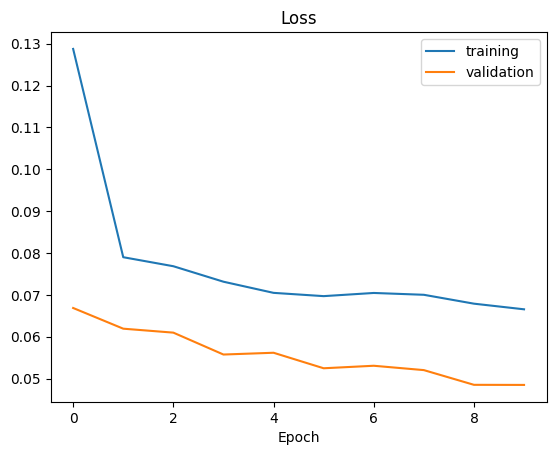

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [101]:
model.save('../model/model.h5')

In [102]:
# Load the trained model.
from keras.models import load_model
model = load_model('../model/model.h5')

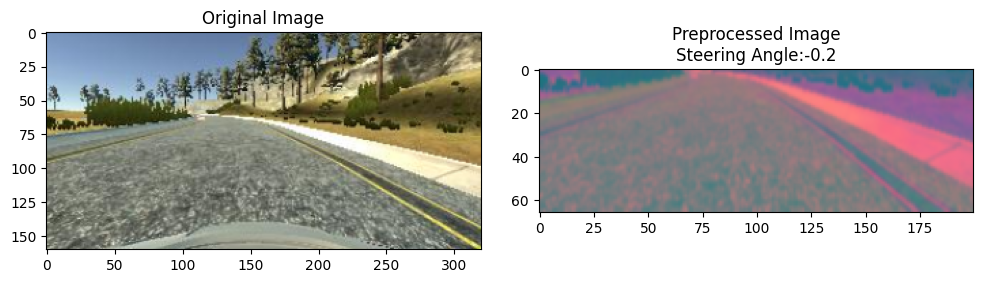

In [143]:
# Load one image and do the prediction.
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1, True))

In [142]:
steering_angle = float(model.predict(x_train_gen[0][None, :, :, :], batch_size=1))
print('Predicted steering angle: ' + str(steering_angle))

Predicted steering angle: 0.3898475766181946


Predicted steering angle: 0.0882352739572525


Text(0.5, 1.0, 'Validation Image')

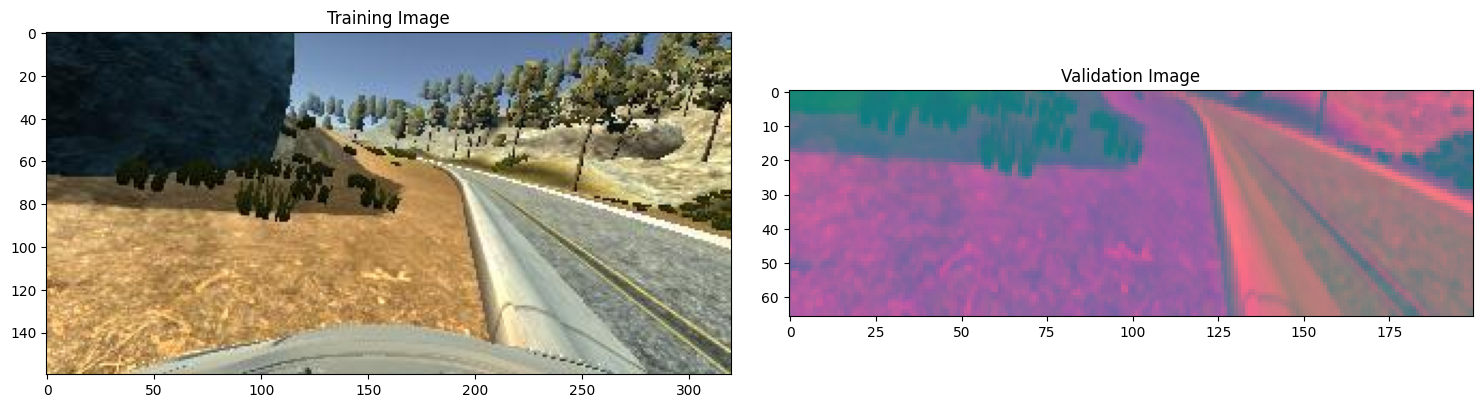

In [155]:
im = mpimg.imread("C:/AI/TrainingBasic/与Unity结合的自动驾驶的神经网络训练TensorFlow/SelfdrivingCar/model/run1/2023_12_23_23_04_50_903.jpg")
processed_im = img_preprocess(im)
steering_angle = float(model.predict(processed_im[None, :, :, :], batch_size=1))
print('Predicted steering angle: ' + str(steering_angle))
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(im)
axs[0].set_title('Training Image')
axs[1].imshow(processed_im)
axs[1].set_title('Validation Image')